In [95]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset
%matplotlib inline

In [38]:
df = pd.read_csv("monthly-milk-production-pounds-p.csv")

In [39]:
df.head()


,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [40]:
df.columns = ['Month', "Milk in pounds per cow"]

In [41]:
df.tail()

,Month,Milk in pounds per cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [42]:
df.dropna(inplace=True)
# or df.drop(168,axis=0, inplace=True)

In [43]:
df.tail()

,Month,Milk in pounds per cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [44]:
df['Month'] = pd.to_datetime(df['Month'])

In [45]:
df.head()

,Month,Milk in pounds per cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [46]:
df.set_index('Month', inplace=True)

In [47]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


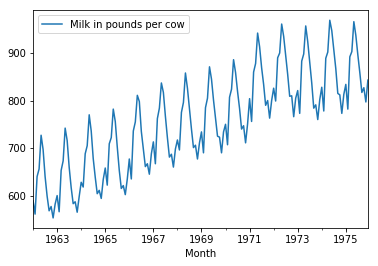

In [49]:
df.plot()

In [13]:
time_series = df['Milk in pounds per cow']

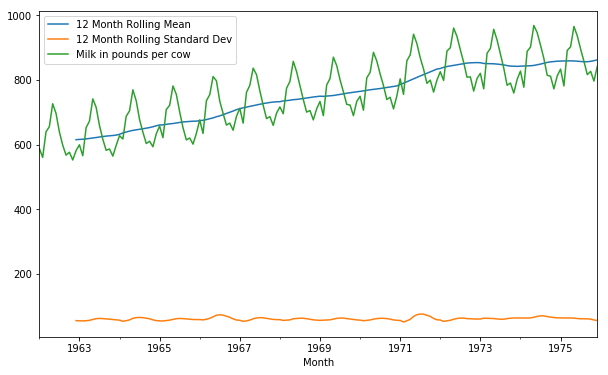

In [50]:
time_series.rolling(12).mean().plot(label="12 Month Rolling Mean", figsize=(10,6))
time_series.rolling(12).std().plot(label="12 Month Rolling Standard Dev")
time_series.plot()
plt.legend();

In [52]:
decomp = seasonal_decompose(time_series,freq=12)

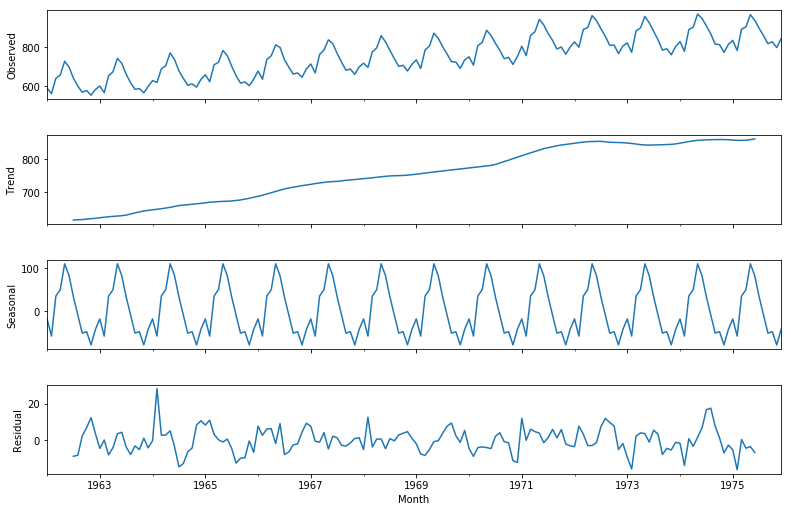

In [53]:
fig = decomp.plot()
fig.set_size_inches(12,8)

In [54]:
# Augmented Dickey-Fuller unit root test
# Hypothesis test
result = adfuller(df['Milk in pounds per cow'])

In [18]:
result

(-1.3038115874221297,
 0.62742670860303162,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [55]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dickey-Fuller Test")
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations used']
    for value,label in zip(result, labels):
        print(label + " : " + str(value))
        
    if result[1] <= 0.05:
        print("Strong Evidence against Null Hypothesis")
        print("Reject Null Hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against Null Hypothesis ")
        print("Fail to reject Null Hypothesis")
        print("Data has unit root and is non-stationary")

In [56]:
adf_check(df['Milk in pounds per cow'])

Augmented Dickey-Fuller Test
ADF Test Statistic : -1.30381158742
p-value : 0.627426708603
# of lags : 13
Num of Observations used : 154
Weak evidence against Null Hypothesis 
Fail to reject Null Hypothesis
Data has unit root and is non-stationary


In [ ]:
# Need to do differencing to get a stationary dataset

In [57]:
df['First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

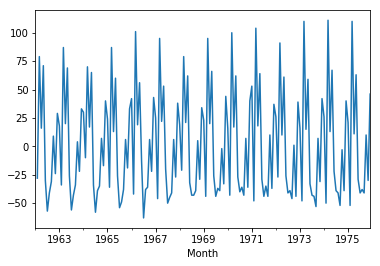

In [58]:
df['First Difference'].plot();

In [59]:
# NaN causes problems. When you shift you get a NaN for the first values.
adf_check(df['First Difference'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic : -3.05499555865
p-value : 0.0300680040018
# of lags : 14
Num of Observations used : 152
Strong Evidence against Null Hypothesis
Reject Null Hypothesis
Data has no unit root and is stationary


In [ ]:
# Data is stationary but in some cases you might need to take a second difference
# Example of taking a second difference

In [61]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

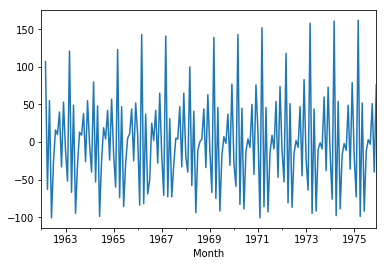

In [62]:
df['Second Difference'].plot();

In [63]:
adf_check(df['Second Difference'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic : -14.3278736456
p-value : 1.11269893321e-26
# of lags : 11
Num of Observations used : 154
Strong Evidence against Null Hypothesis
Reject Null Hypothesis
Data has no unit root and is stationary


In [64]:
# Seasonal Difference
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)

In [65]:
df.head()

,Milk in pounds per cow,First Difference,Second Difference,Seasonal Difference
Month,,,,
1962-01-01,589.0,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN
1962-04-01,656.0,16.0,-63.0,NaN
1962-05-01,727.0,71.0,55.0,NaN


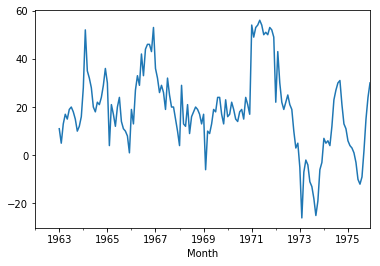

In [66]:
df['Seasonal Difference'].plot();

In [67]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic : -2.33541931436
p-value : 0.160798805277
# of lags : 12
Num of Observations used : 143
Weak evidence against Null Hypothesis 
Fail to reject Null Hypothesis
Data has unit root and is non-stationary


In [68]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

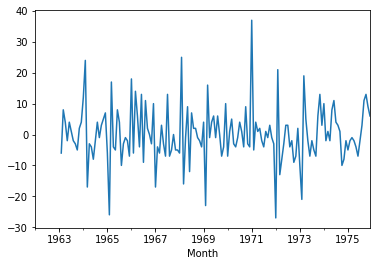

In [69]:
df['Seasonal First Difference'].plot();

In [70]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test
ADF Test Statistic : -5.03800227492
p-value : 1.86542343188e-05
# of lags : 11
Num of Observations used : 143
Strong Evidence against Null Hypothesis
Reject Null Hypothesis
Data has no unit root and is stationary


In [35]:
# Need to look at the AutoCorrelation and Partial AutoCorrelation Plots

In [71]:
df.head()

,Milk in pounds per cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference
Month,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN


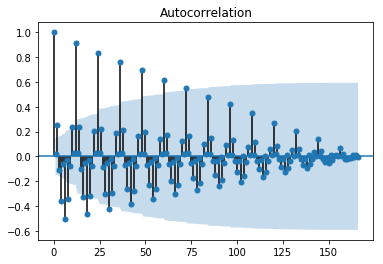

In [74]:
fig_first = plot_acf(df['First Difference'].dropna());

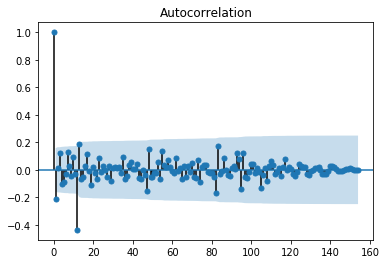

In [75]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

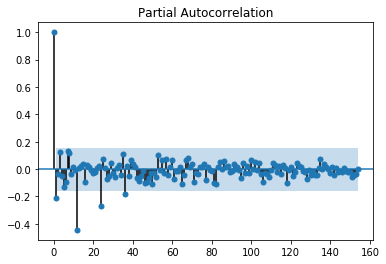

In [76]:
fig_first_pacf = plot_pacf(df['Seasonal First Difference'].dropna())

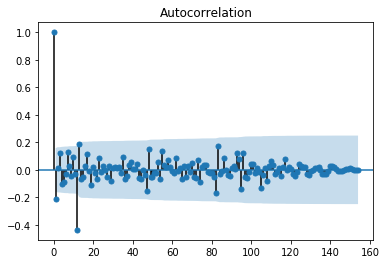

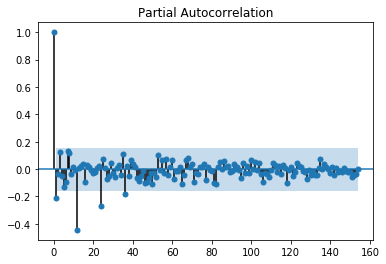

In [81]:
fig_seasonal_first_acf = plot_acf(df['Seasonal First Difference'].dropna())
fig_seasonal_first_pacf = plot_pacf(df['Seasonal First Difference'].dropna())

In [83]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))

In [84]:
results = model.fit()

In [85]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Wed, 30 Aug 2017   AIC                           1074.131
Time:                                    20:51:17   BIC                           1083.503
Sample:                                01-01-1962   HQIC                          1077.934
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

In [86]:
results.resid.head()

Month
1962-01-01    589.0
1962-02-01    -28.0
1962-03-01     79.0
1962-04-01     16.0
1962-05-01     71.0
dtype: float64

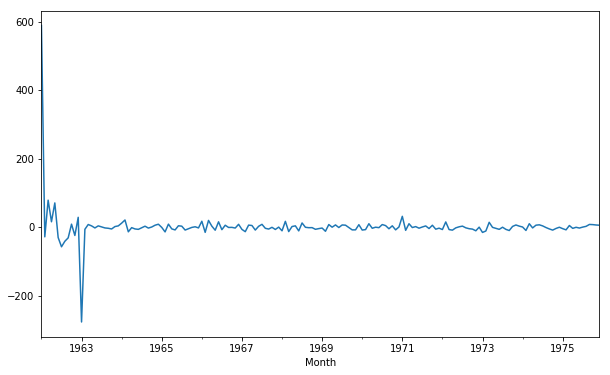

In [89]:
results.resid.plot(figsize=(10,6));

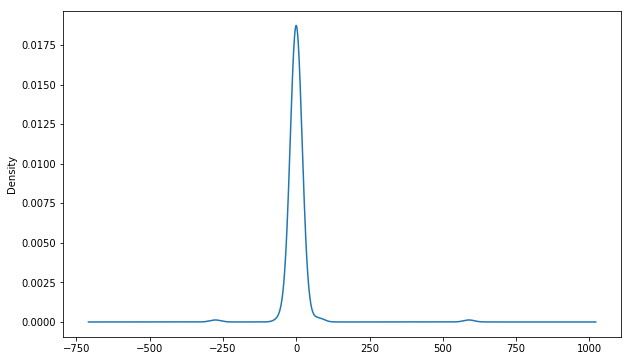

In [91]:
results.resid.plot(kind='kde',figsize=(10,6));

In [92]:
df['forecast'] = results.predict(start=150, end=168)

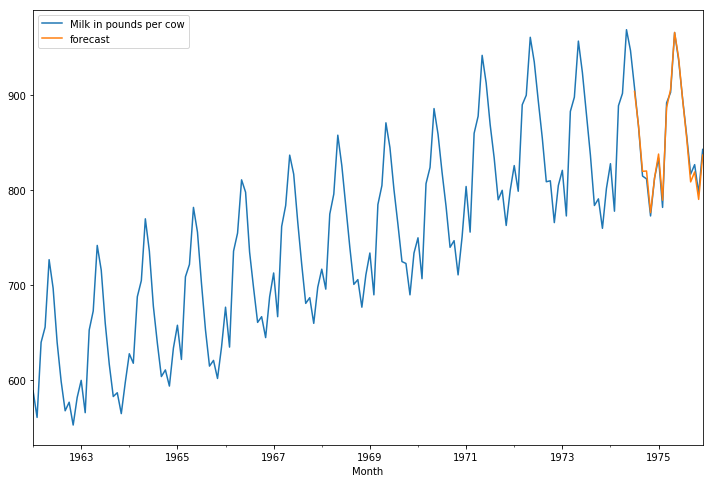

In [94]:
df[['Milk in pounds per cow','forecast']].plot(figsize=(12,8));

In [96]:
# Need to add more dates to the index so we can predict into the future
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [97]:
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

In [98]:
final_df = pd.concat([df,future_df])

In [101]:
final_df.tail()

,Milk in pounds per cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
final_df['forecast'] = results.predict(start=150, end=192 )

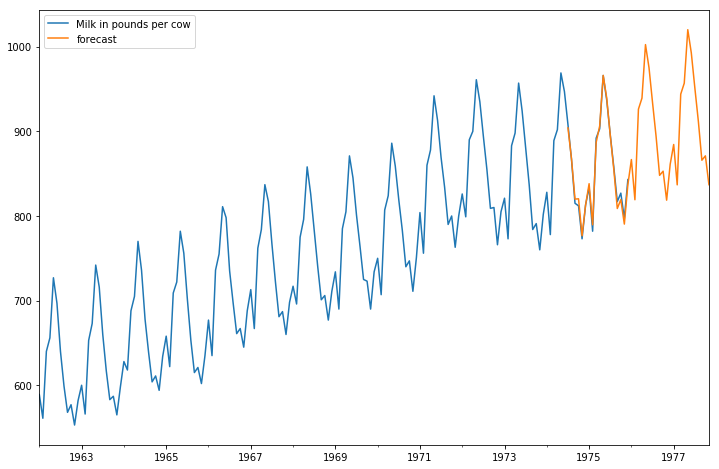

In [105]:
final_df[['Milk in pounds per cow','forecast']].plot(figsize=(12,8));